# HR Analytics Project- Understanding the Attrition in HR
Project Description
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?
HR Analytics
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.
Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.
Attrition affecting Companies
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


Dataset Link-
•	https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics



In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import pickle

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Importing all the necessary libraries here.

In [2]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [4]:
df_HR = pd.read_excel('Attrition.xlsx')

In [5]:
df_HR

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

# Exploratory Data Analysis (EDA)

In [6]:
df_HR.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Ensuring that in future observations we do not have any truncated information being displayed in our Jupter Notebook.

In [8]:
df_HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
df_HR.nunique().to_frame("Unique Values")

Unique Values
Age                                  43
Attrition                             2
BusinessTravel                        3
DailyRate                           886
Department                            3
DistanceFromHome                     29
Education                             5
EducationField                        6
EmployeeCount                         1
EmployeeNumber                     1470
EnvironmentSatisfaction               4
Gender                                2
HourlyRate                           71
JobInvolvement                        4
JobLevel                              5
JobRole                               9
JobSatisfaction                       4
MaritalStatus                         3
MonthlyIncome                      1349
MonthlyRate                        1427
NumCompaniesWorked                   10
Over18                                1
OverTime                              2
PercentSalaryHike                    15
PerformanceRating                     2
RelationshipSatisfaction              4
StandardHours                         1
StockOptionLevel                      4
TotalWorkingYears                    40
TrainingTimesLastYear                 7
WorkLifeBalance                       4
YearsAtCompany                       37
YearsInCurrentRole                   19
YearsSinceLastPromotion              16
YearsWithCurrManager                 18

In [10]:
df_HR.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
df_HR.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [12]:
df_HR.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis=1, inplace=True)

I am dropping all the unwanted columns after careful observations done above.

EmployeeCount - All the rows in this column are filled with just a single number "1" which cannot provide much information related to attrition of an employee
EmployeeNumber - Since it is just a unique number provided to each employee that has nothing to do with attrition
Over18 - As per child labour law any person below the age of 18 is not eligible for employement in India and also this particular column has 1 single value for all the rows therefore it does not add much value considering the attrition of the employees
StandardHours - Again in this column we have single value for all the rows that is "80" hours as a standardized policy so does not make much difference with respect to attrition as there is no partiality in these terms on any employee

In [13]:
object_datatype = []
for x in df_HR.dtypes.index:
    if df_HR.dtypes[x] == 'object':
        object_datatype.append(x)
object_datatype

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [14]:
integer_datatype = []
for x in df_HR.dtypes.index:
    if df_HR.dtypes[x] == 'int64':
        integer_datatype.append(x)
integer_datatype

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

# Visualization

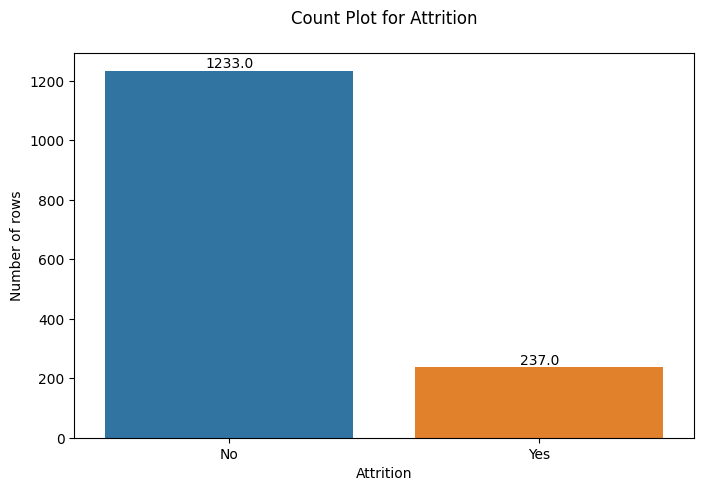

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
col_name = 'Attrition'

# Use Seaborn's countplot without specifying a palette
ax = sns.countplot(data=df_HR, x=col_name)

# Annotate the counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.title(f"Count Plot for {col_name}\n")
plt.ylabel("Number of rows")
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.show()


So looking at the above countplot we can see that our target label is quite imbalanced and will needed to be treated for the same.

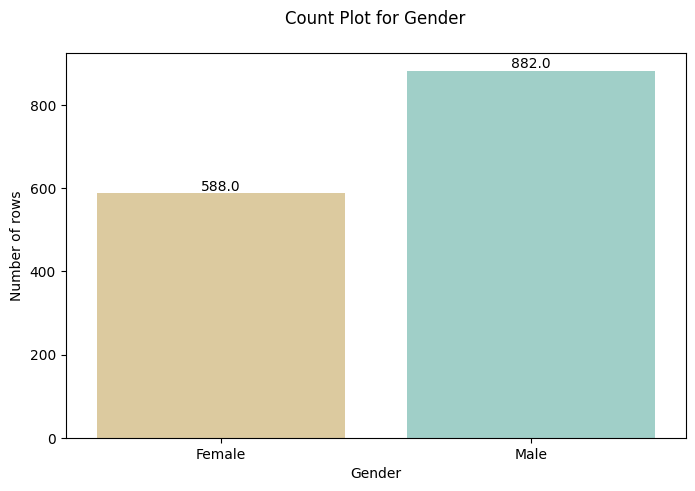

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
col_name = 'Gender'

# Use Seaborn's countplot with the 'data' parameter to specify the DataFrame
ax = sns.countplot(data=df_HR, x=col_name, palette="BrBG")

# Annotate the counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.title(f"Count Plot for {col_name}\n")
plt.ylabel("Number of rows")
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.show()


In the Gender column we can see that the number of male employees is higher than the female employees. This is one of the situation in mostly all the organizational workforce across India.

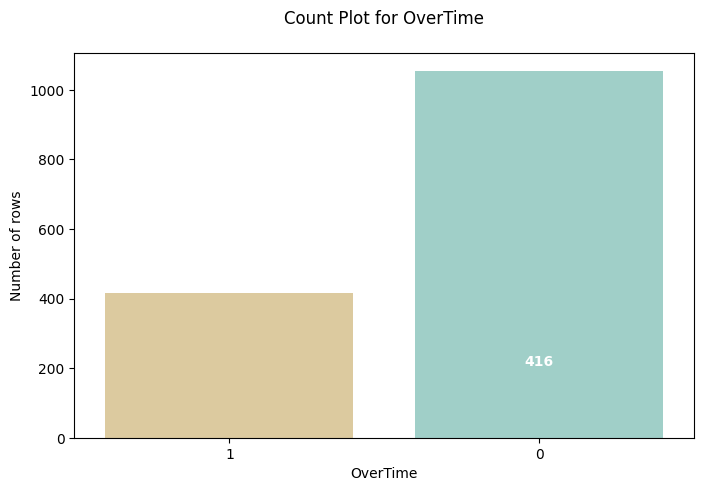

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
col_name = 'OverTime'
values = df_HR[col_name].value_counts()

ax = sns.countplot(x=df_HR[col_name], palette="BrBG")

for i, value in enumerate(values):
    ax.text(i, value / 2, str(value), 
            horizontalalignment="center", fontweight='bold', color='w')

plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(range(len(values)), values.index)  # Set custom x-axis labels
plt.show()


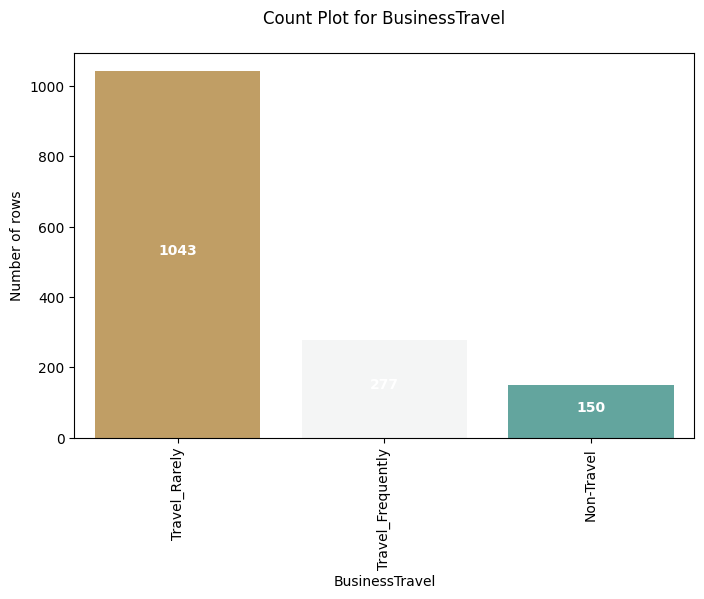

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
col_name = 'BusinessTravel'

values = df_HR[col_name].value_counts()
ax = sns.countplot(x=df_HR[col_name], palette="BrBG")

# Set custom x-axis labels
plt.xticks(range(len(values)), values.index, rotation=90)

for i, value in enumerate(values):
    ax.text(i, value / 2, str(value), 
            horizontalalignment="center", fontweight='bold', color='w')

plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.show()


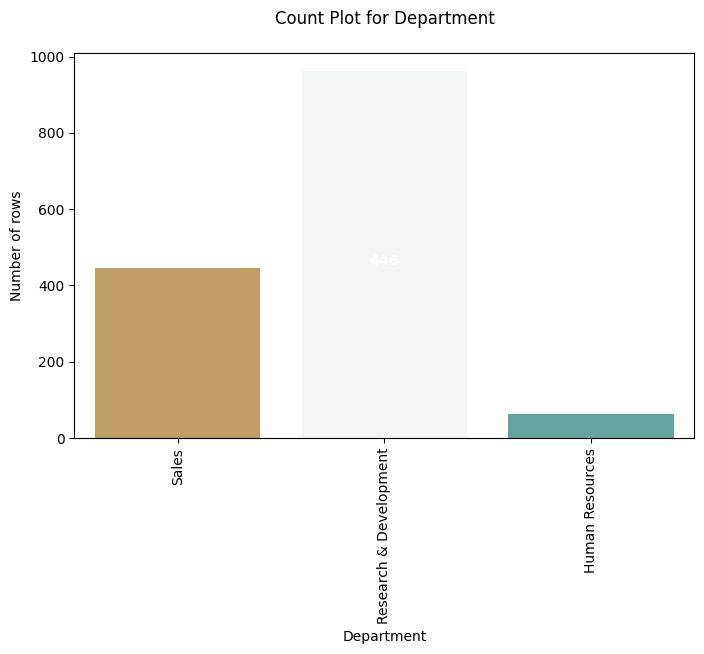

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
col_name = 'Department'

ax = sns.countplot(x=df_HR[col_name], palette="BrBG")

# Annotate the counts on the bars
for i, v in enumerate(df_HR[col_name].value_counts()):
    ax.text(i, v, str(v), ha='center', va='bottom', fontweight='bold', color='w')

plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()


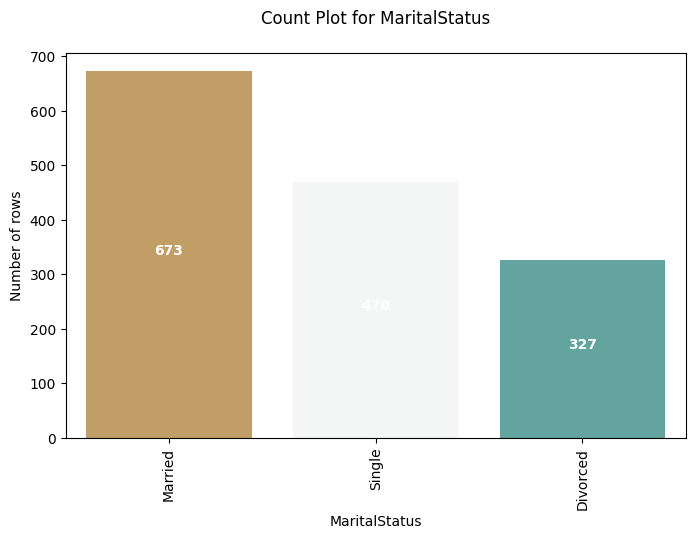

In [42]:
plt.figure(figsize=(8,5))
col_name = 'MaritalStatus'
values = df_HR[col_name].value_counts()

ax = sns.barplot(x=values.index, y=values, palette="BrBG")
ax.set(xlabel=col_name, ylabel="Number of rows")
ax.set_title(f"Count Plot for {col_name}\n")
plt.xticks(rotation=90)

for index, value in enumerate(values):
    ax.text(index, value / 2, str(value), horizontalalignment='center', fontweight='bold', color='w')

plt.show()


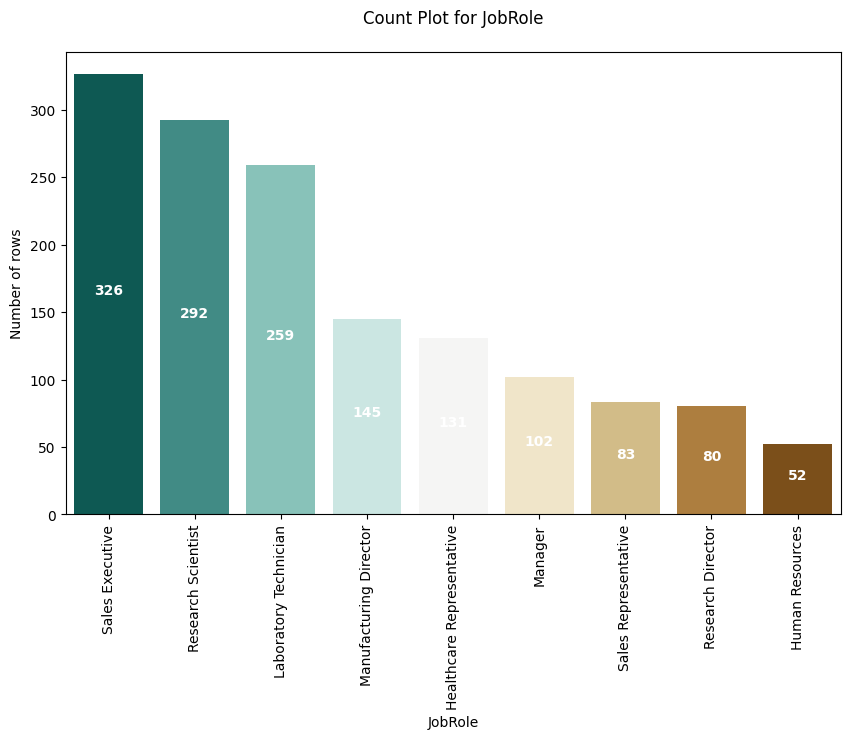

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
col_name = 'JobRole'
values = df_HR[col_name].value_counts()

ax = sns.barplot(x=values.index, y=values, palette="BrBG_r")
ax.set(xlabel=col_name, ylabel="Number of rows")
ax.set_title(f"Count Plot for {col_name}\n")
plt.xticks(rotation=90)

for index, value in enumerate(values):
    ax.text(index, value / 2, str(value), horizontalalignment='center', fontweight='bold', color='w')

plt.show()


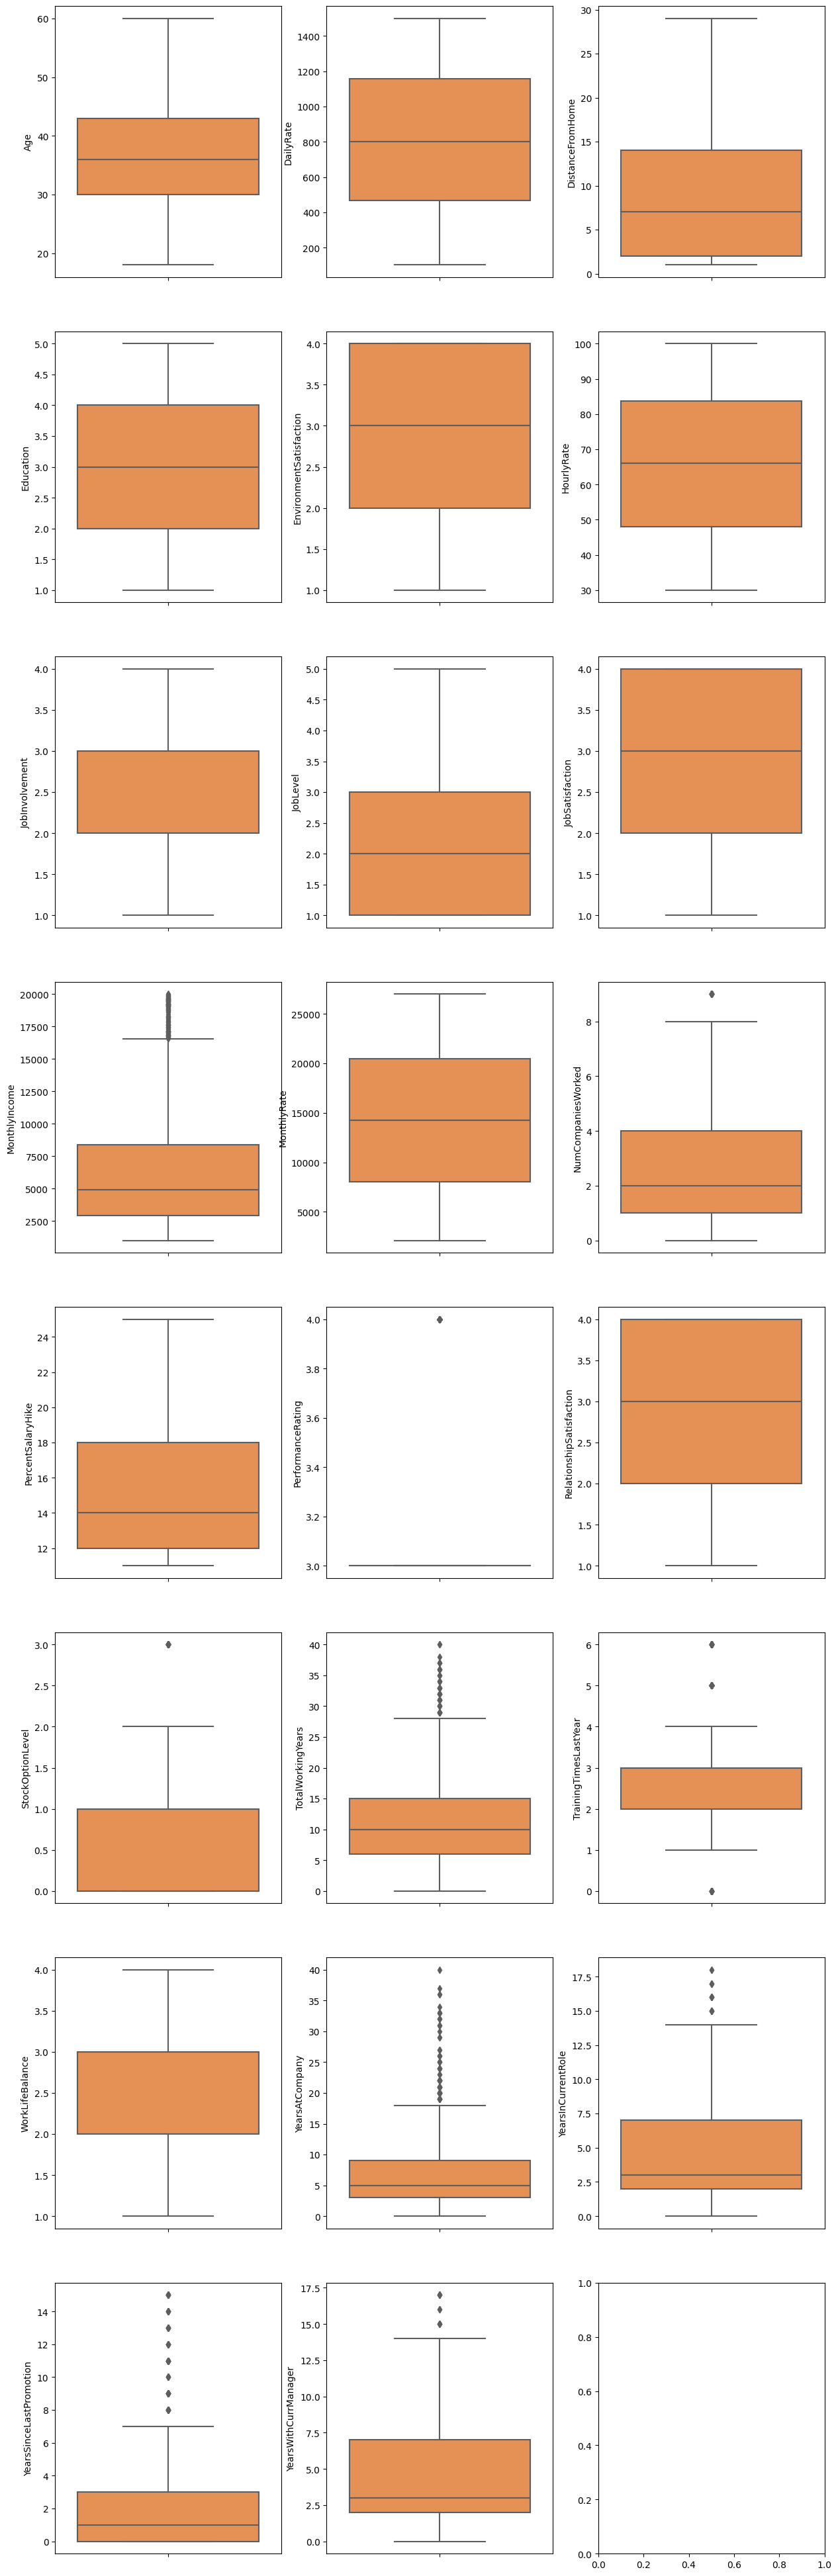

In [47]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df_HR[integer_datatype].items():
    sns.boxplot(y=col, data=df_HR, ax=ax[index], palette="Oranges")
    index += 1
plt.show()

# We have created a box plot visual for all our integer datatype columns to check for outliers. We do see some of the columns where there are presence of outliers and we will need to treat it accordingly.

MonthlyIncome
NumCompaniesWorked
PerformanceRating
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager
All the above columns show visible outlier details.

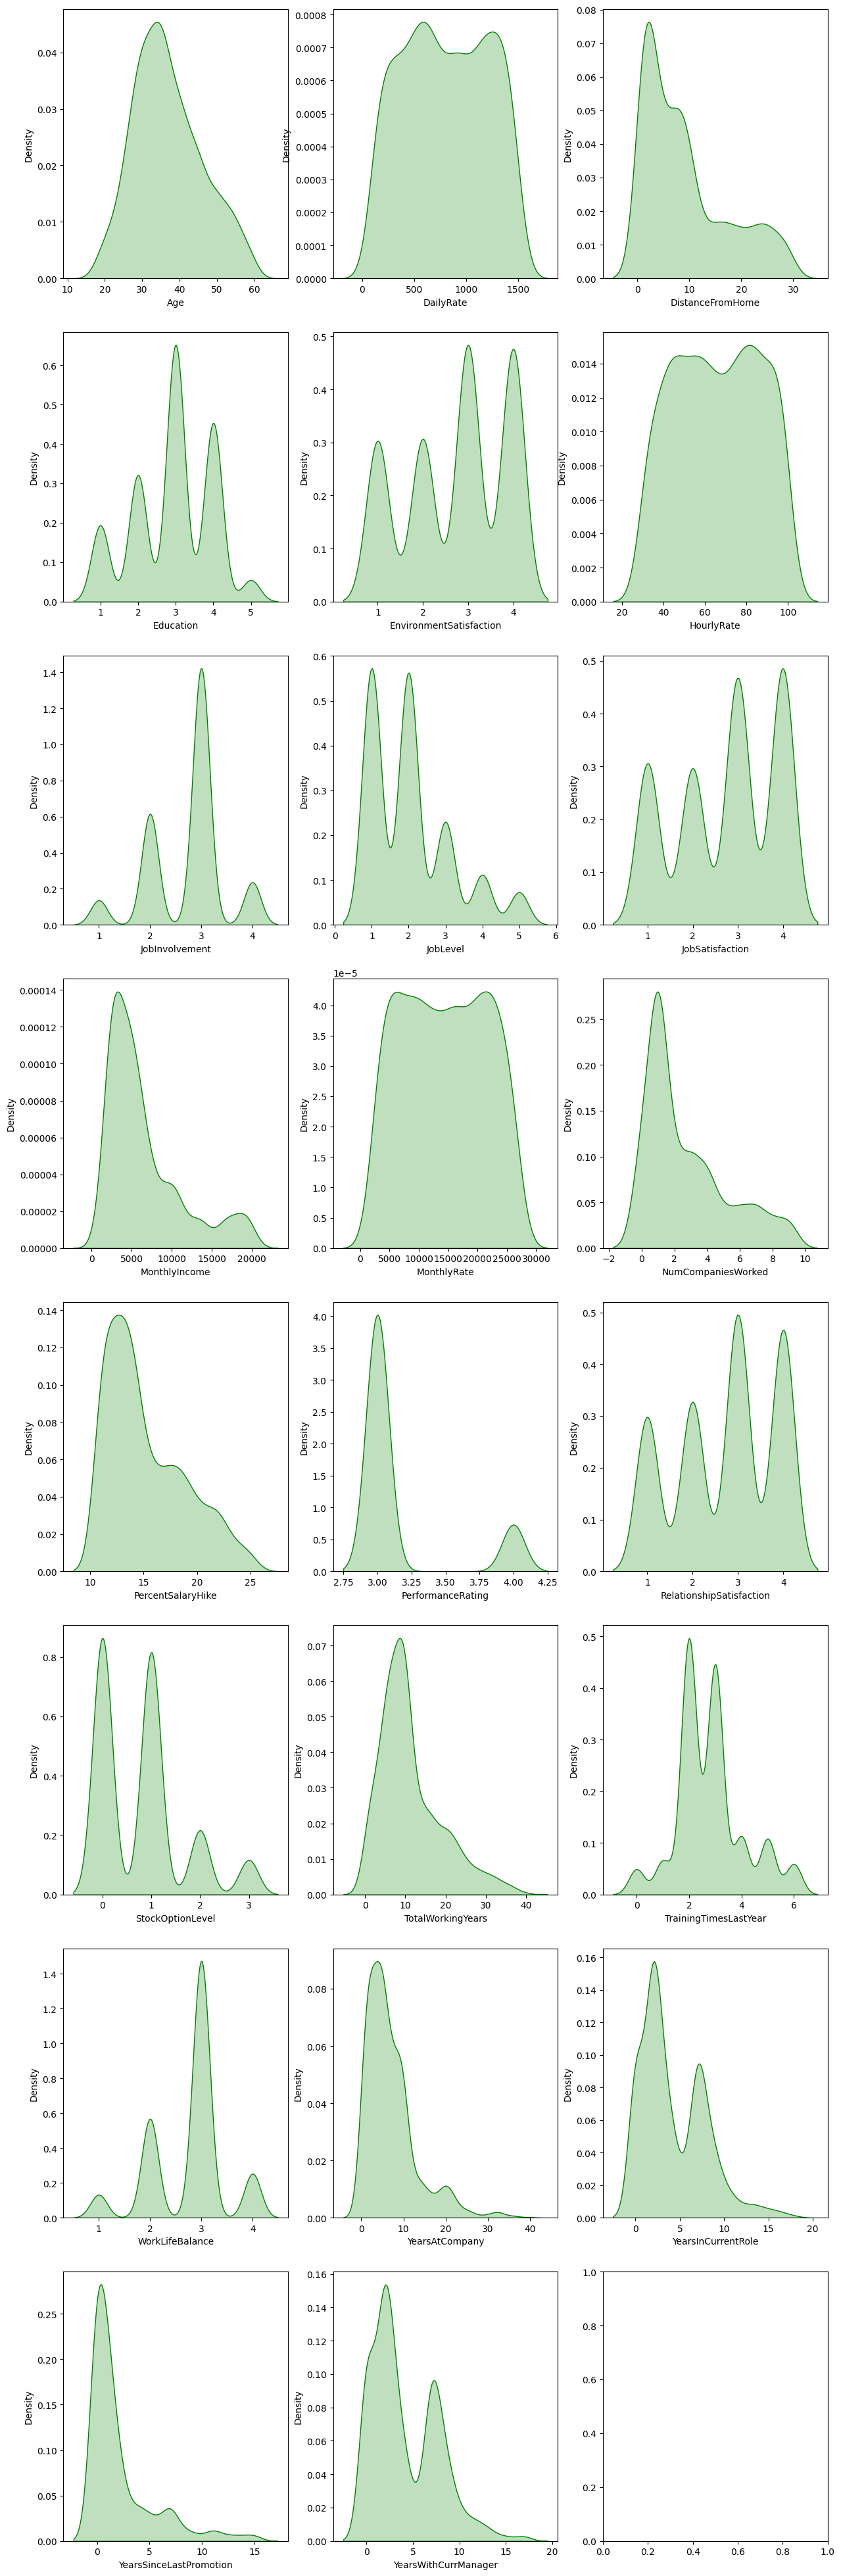

In [48]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df_HR[integer_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.show()

With the help of above distribution plot we are able to see some skewness present in few columns that will need to be handled as well.

DistanceFromHome
MonthlyIncome
NumCompaniesWorked
PercentSalaryHike
TotalWorkingYears
TrainingTimesLastYear
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager
Above columns are showing some visible skewness mostly right skewed data presence.

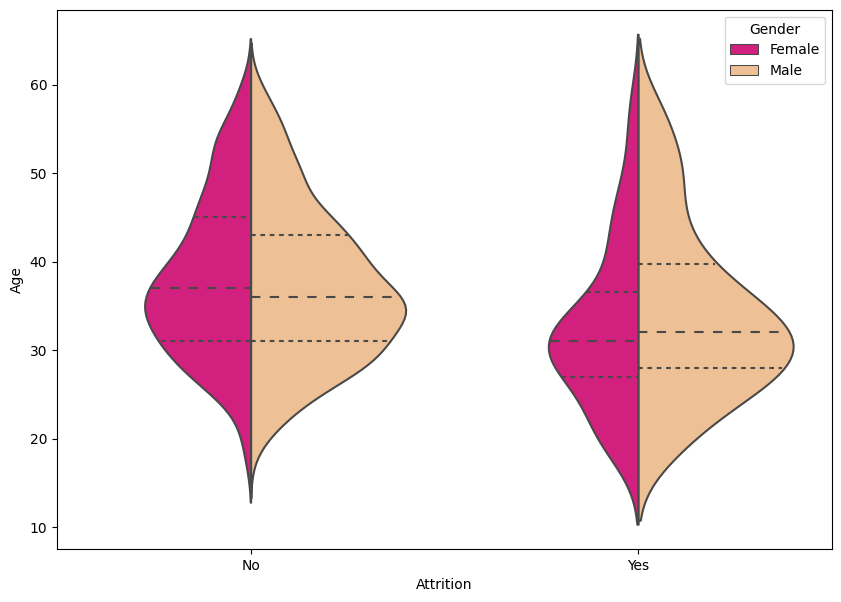

In [49]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="Age", hue="Gender", data=df_HR, 
               palette="Accent_r", split=True, scale="count", inner="quartile")
plt.show()

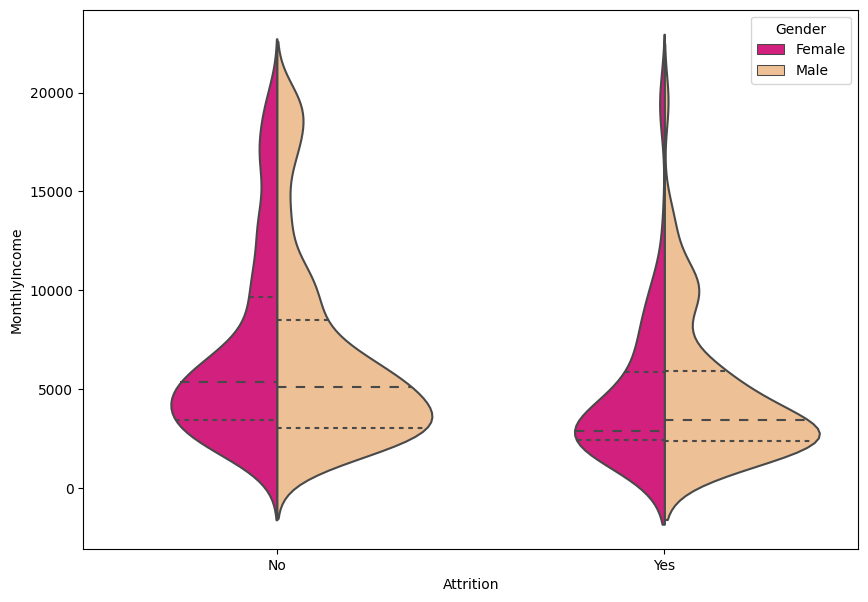

In [50]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="MonthlyIncome", hue="Gender", data=df_HR, 
               palette="Accent_r", split=True, scale="count", inner="quartile")
plt.show()


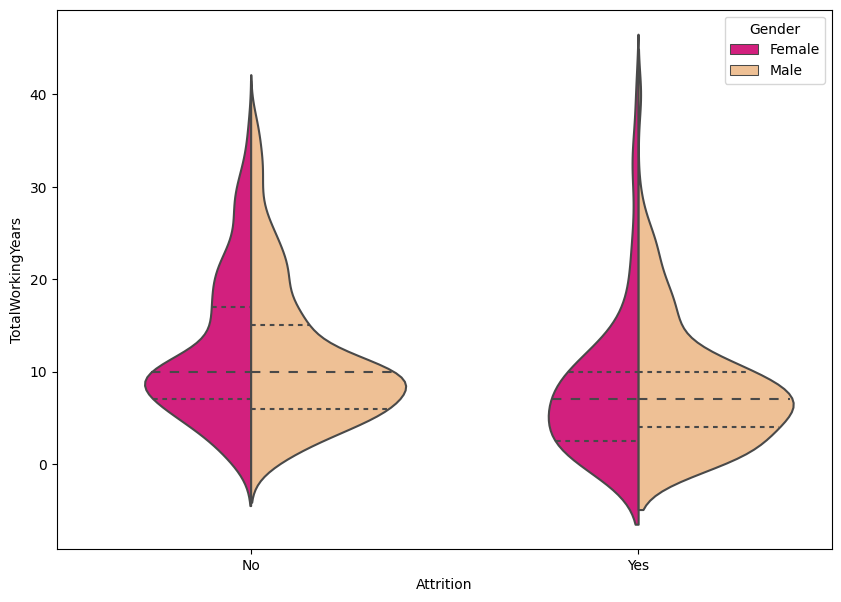

In [51]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="TotalWorkingYears", hue="Gender", data=df_HR, 
               palette="Accent_r", split=True, scale="count", inner="quartile")
plt.show()

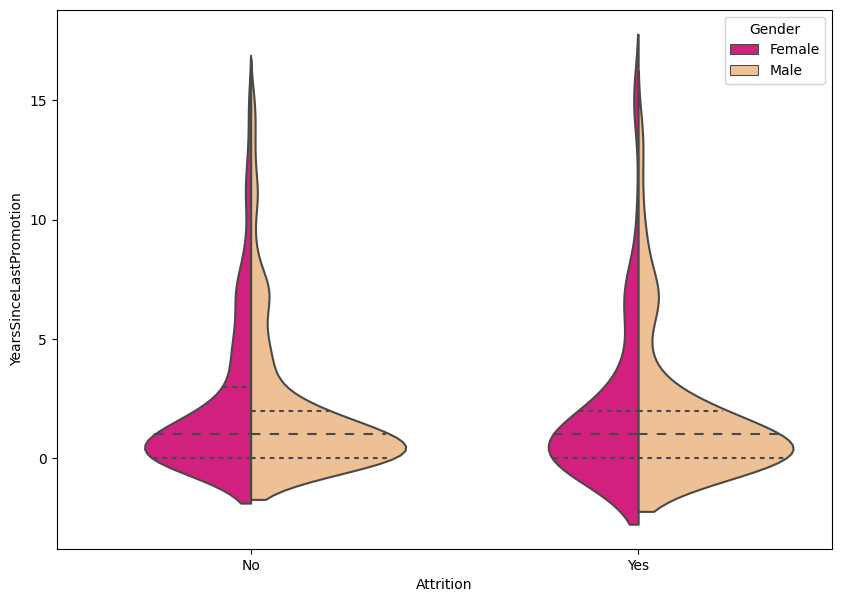

In [52]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="YearsSinceLastPromotion", hue="Gender", data=df_HR, 
               palette="Accent_r", split=True, scale="count", inner="quartile")
plt.show()

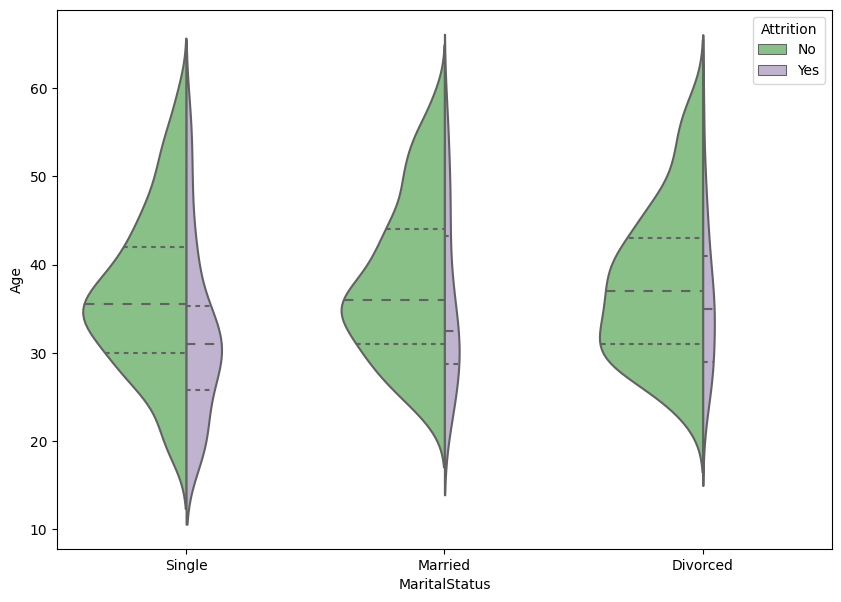

In [53]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="Age", hue="Attrition", data=df_HR, 
               palette="Accent", split=True, scale="count", inner="quartile")
plt.show()


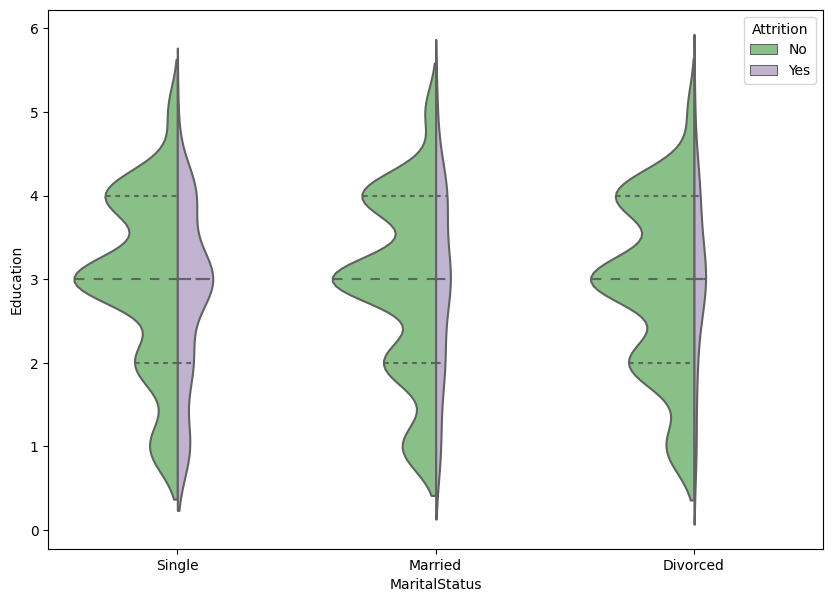

In [54]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="Education", hue="Attrition", data=df_HR, 
               palette="Accent", split=True, scale="count", inner="quartile")
plt.show()

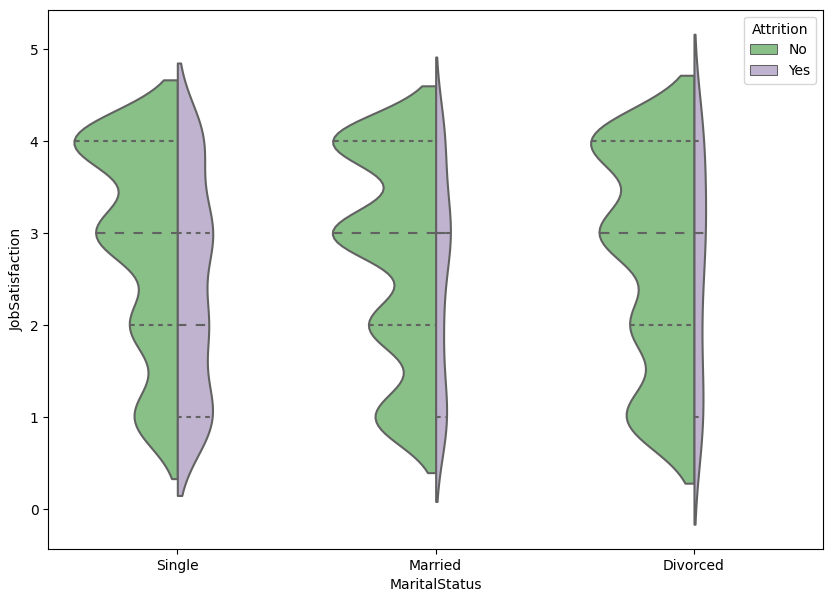

In [55]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="JobSatisfaction", hue="Attrition", data=df_HR, 
               palette="Accent", split=True, scale="count", inner="quartile")
plt.show()

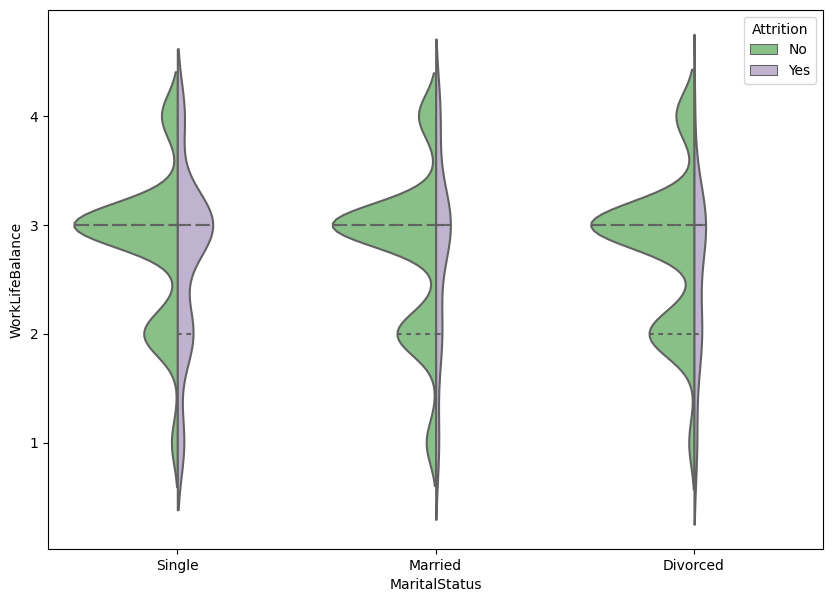

In [56]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="WorkLifeBalance", hue="Attrition", data=df_HR, 
               palette="Accent", split=True, scale="count", inner="quartile")
plt.show()

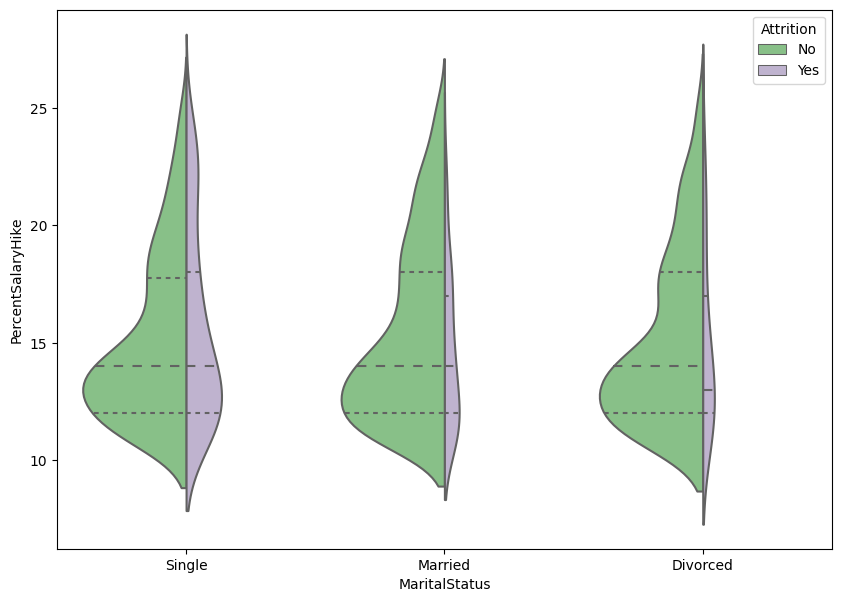

In [57]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="PercentSalaryHike", hue="Attrition", data=df_HR, 
               palette="Accent", split=True, scale="count", inner="quartile")
plt.show()


# Encoding the categorical object datatype columns

In [58]:
# Label Encoder

le = LabelEncoder()
le.fit(df_HR["Attrition"])
le.classes_
pd.Series(le.transform(df_HR["Attrition"])).head()

0    1
1    0
2    1
3    0
4    0
dtype: int32

In [59]:
df_HR["Attrition"] = le.fit_transform(df_HR["Attrition"])
df_HR.head()


Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  \
0  Female          94               3         2        Sales Executive   
1    Male          61               2         2     Research Scientist   
2    Male          92               2         1  Laboratory Technician   
3  Female          56               3         1     Research Scientist   
4    Male          40               3         1  Laboratory Technician   

   JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                4        Single           5993        19479   
1                2       Married           5130        24907   
2                3        Single           2090         2396   
3                3       Married           2909        23159   
4                2       Married           3468        16632   

   NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  \
0                   8         0                 11                  3   
1                   1         1                 23                  4   
2                   6         0                 15                  3   
3                   1         0                 11                  3   
4                   9         1                 12                  3   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   
2                         2                 0                  7   
3                         3                 0                  8   
4                         4                 1                  6   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   
3                      3                3               8                   7   
4                      3                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [60]:
# Ordinal Encoder

oe = OrdinalEncoder()
df_HR['BusinessTravel'] = oe.fit_transform(df_HR['BusinessTravel'].values.reshape(-1,1))
df_HR['Department'] = oe.fit_transform(df_HR['Department'].values.reshape(-1,1))
df_HR['EducationField'] = oe.fit_transform(df_HR['EducationField'].values.reshape(-1,1))
df_HR['Gender'] = oe.fit_transform(df_HR['Gender'].values.reshape(-1,1))
df_HR['JobRole'] = oe.fit_transform(df_HR['JobRole'].values.reshape(-1,1))
df_HR['MaritalStatus'] = oe.fit_transform(df_HR['MaritalStatus'].values.reshape(-1,1))
df_HR['OverTime'] = oe.fit_transform(df_HR['OverTime'].values.reshape(-1,1))

In [61]:
df_HR.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1             2.0       1102         2.0                 1   
1   49          0             1.0        279         1.0                 8   
2   37          1             2.0       1373         1.0                 2   
3   33          0             1.0       1392         1.0                 3   
4   27          0             2.0        591         1.0                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0          2             1.0                        2     0.0          94   
1          1             1.0                        3     1.0          61   
2          2             4.0                        4     1.0          92   
3          4             1.0                        4     0.0          56   
4          1             3.0                        1     1.0          40   

   JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  \
0               3         2      7.0                4            2.0   
1               2         2      6.0                2            1.0   
2               2         1      2.0                3            2.0   
3               3         1      6.0                3            1.0   
4               3         1      2.0                2            1.0   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0           5993        19479                   8       0.0   
1           5130        24907                   1       1.0   
2           2090         2396                   6       0.0   
3           2909        23159                   1       0.0   
4           3468        16632                   9       1.0   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   
2                 15                  3                         2   
3                 11                  3                         3   
4                 12                  3                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

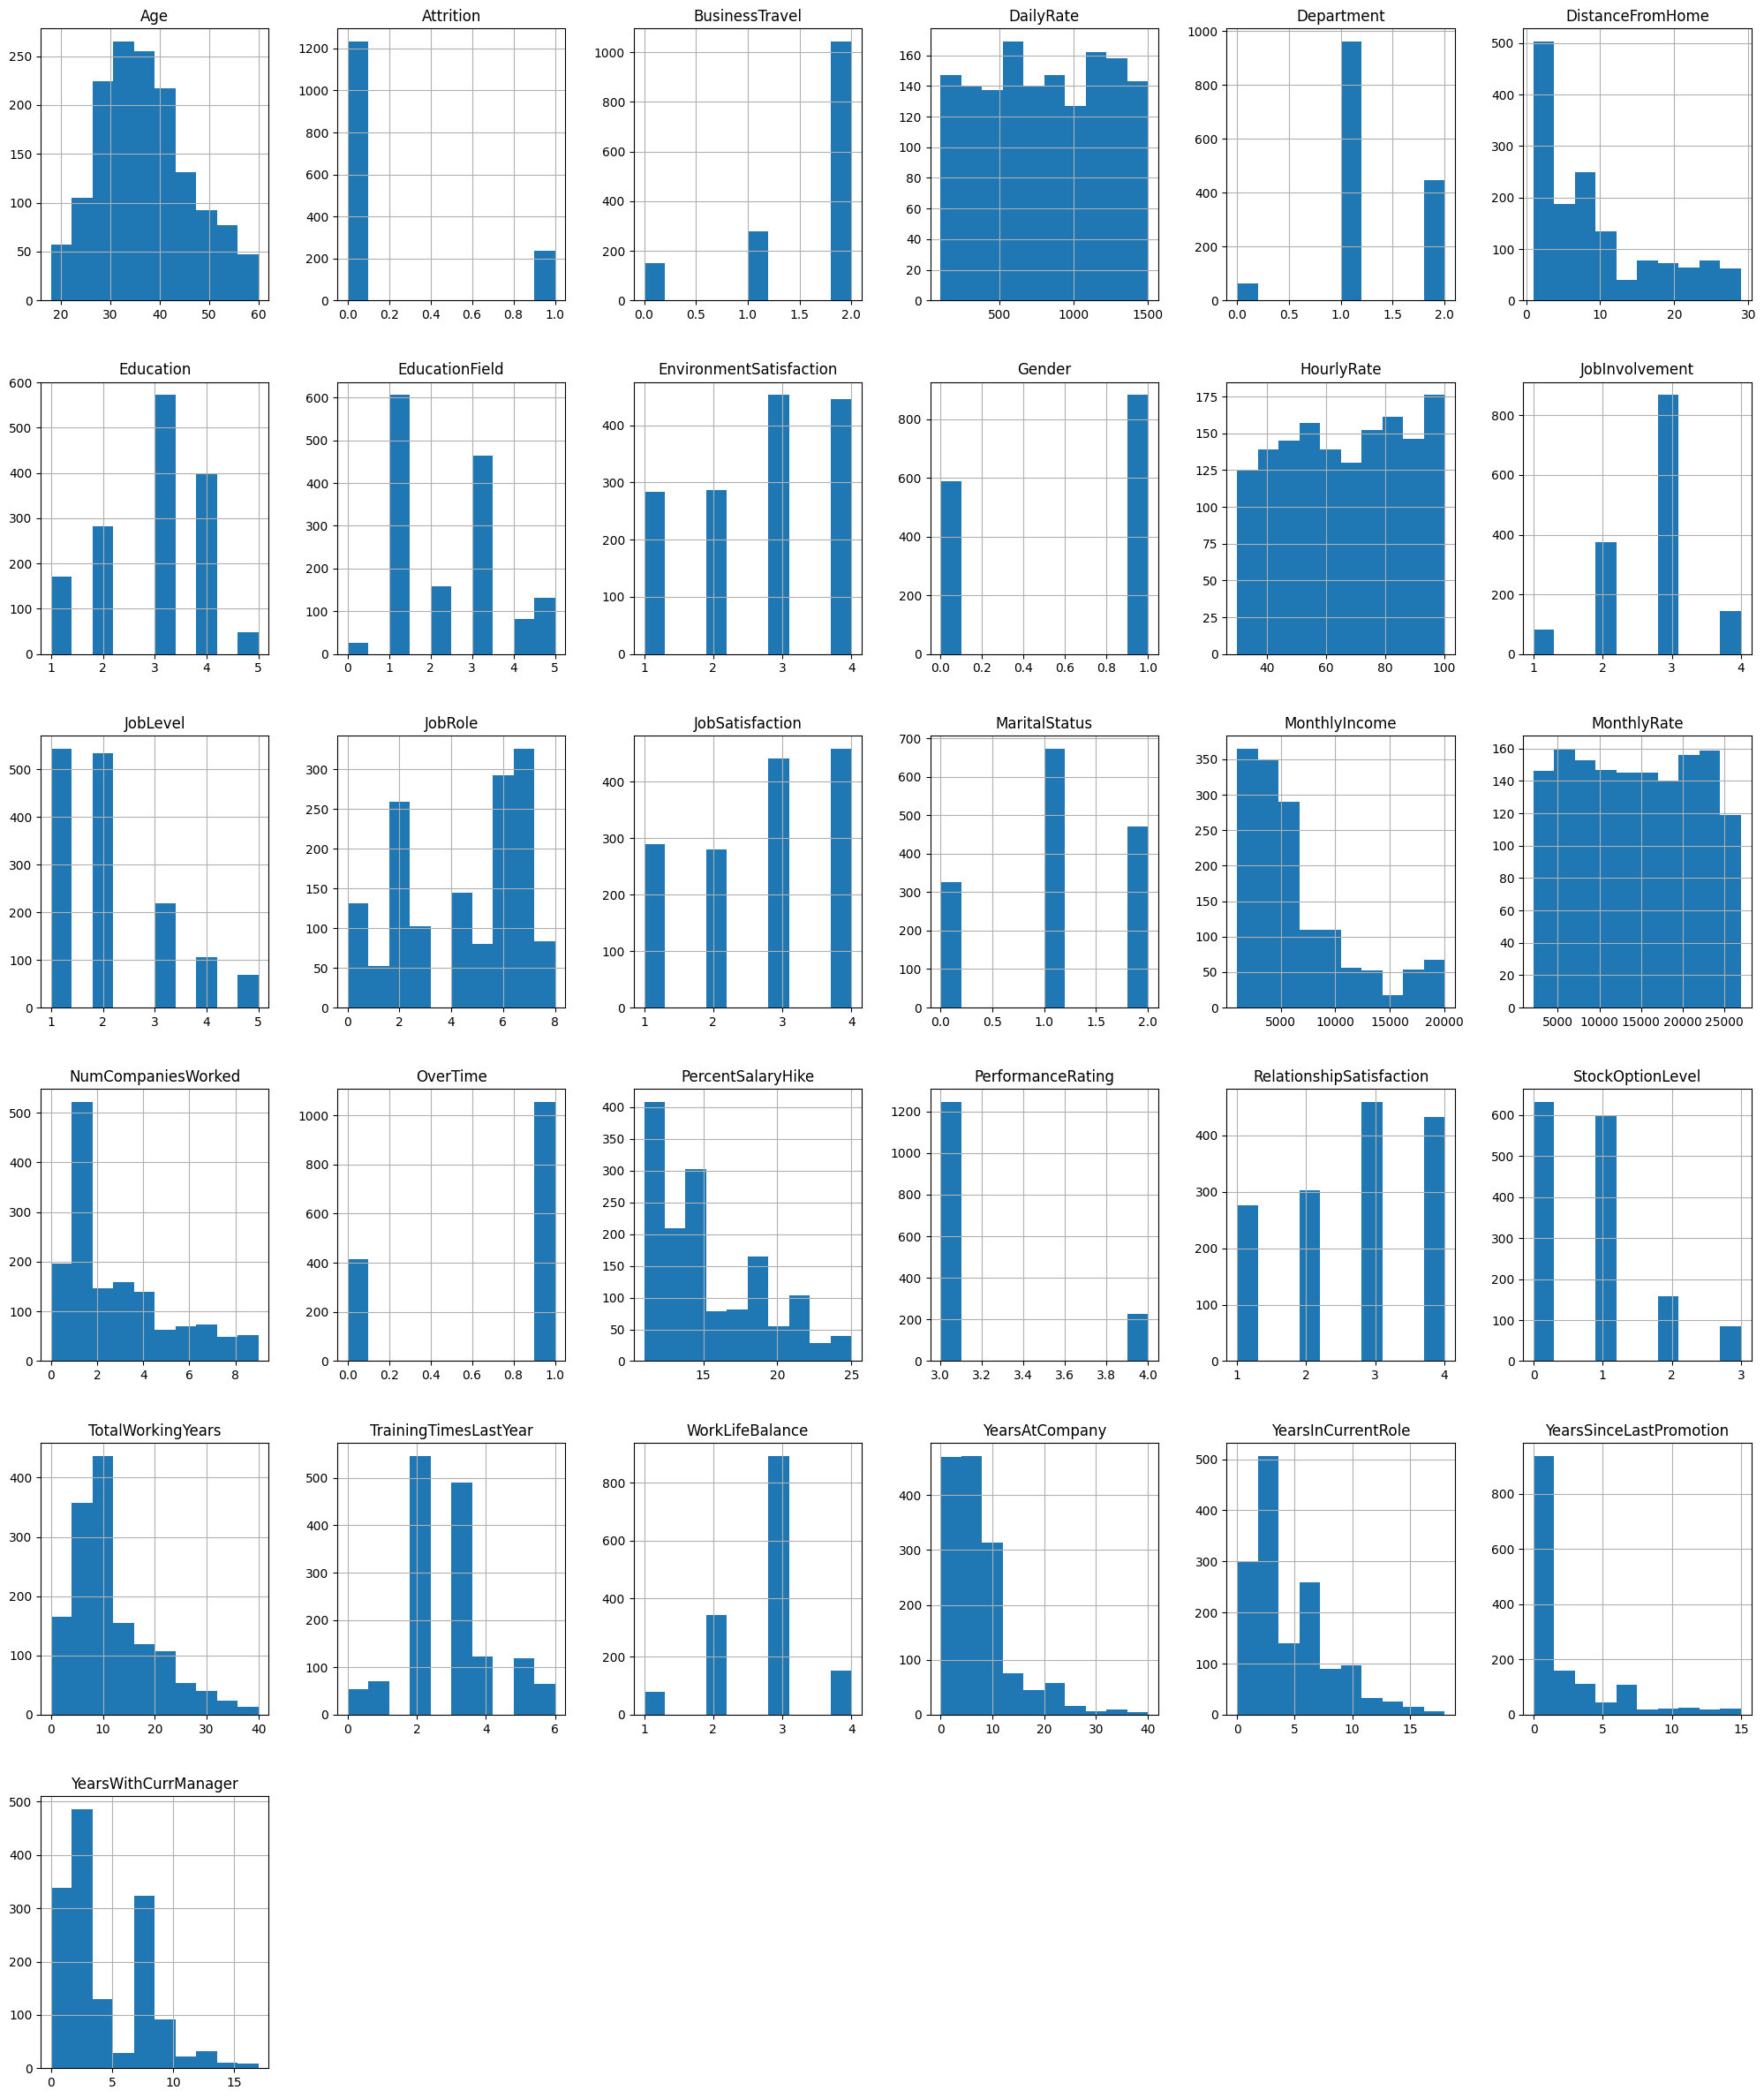

In [62]:
df_HR.hist(figsize=(25,30))
plt.show()


# Correlation using a Heatmap
Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.
Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down

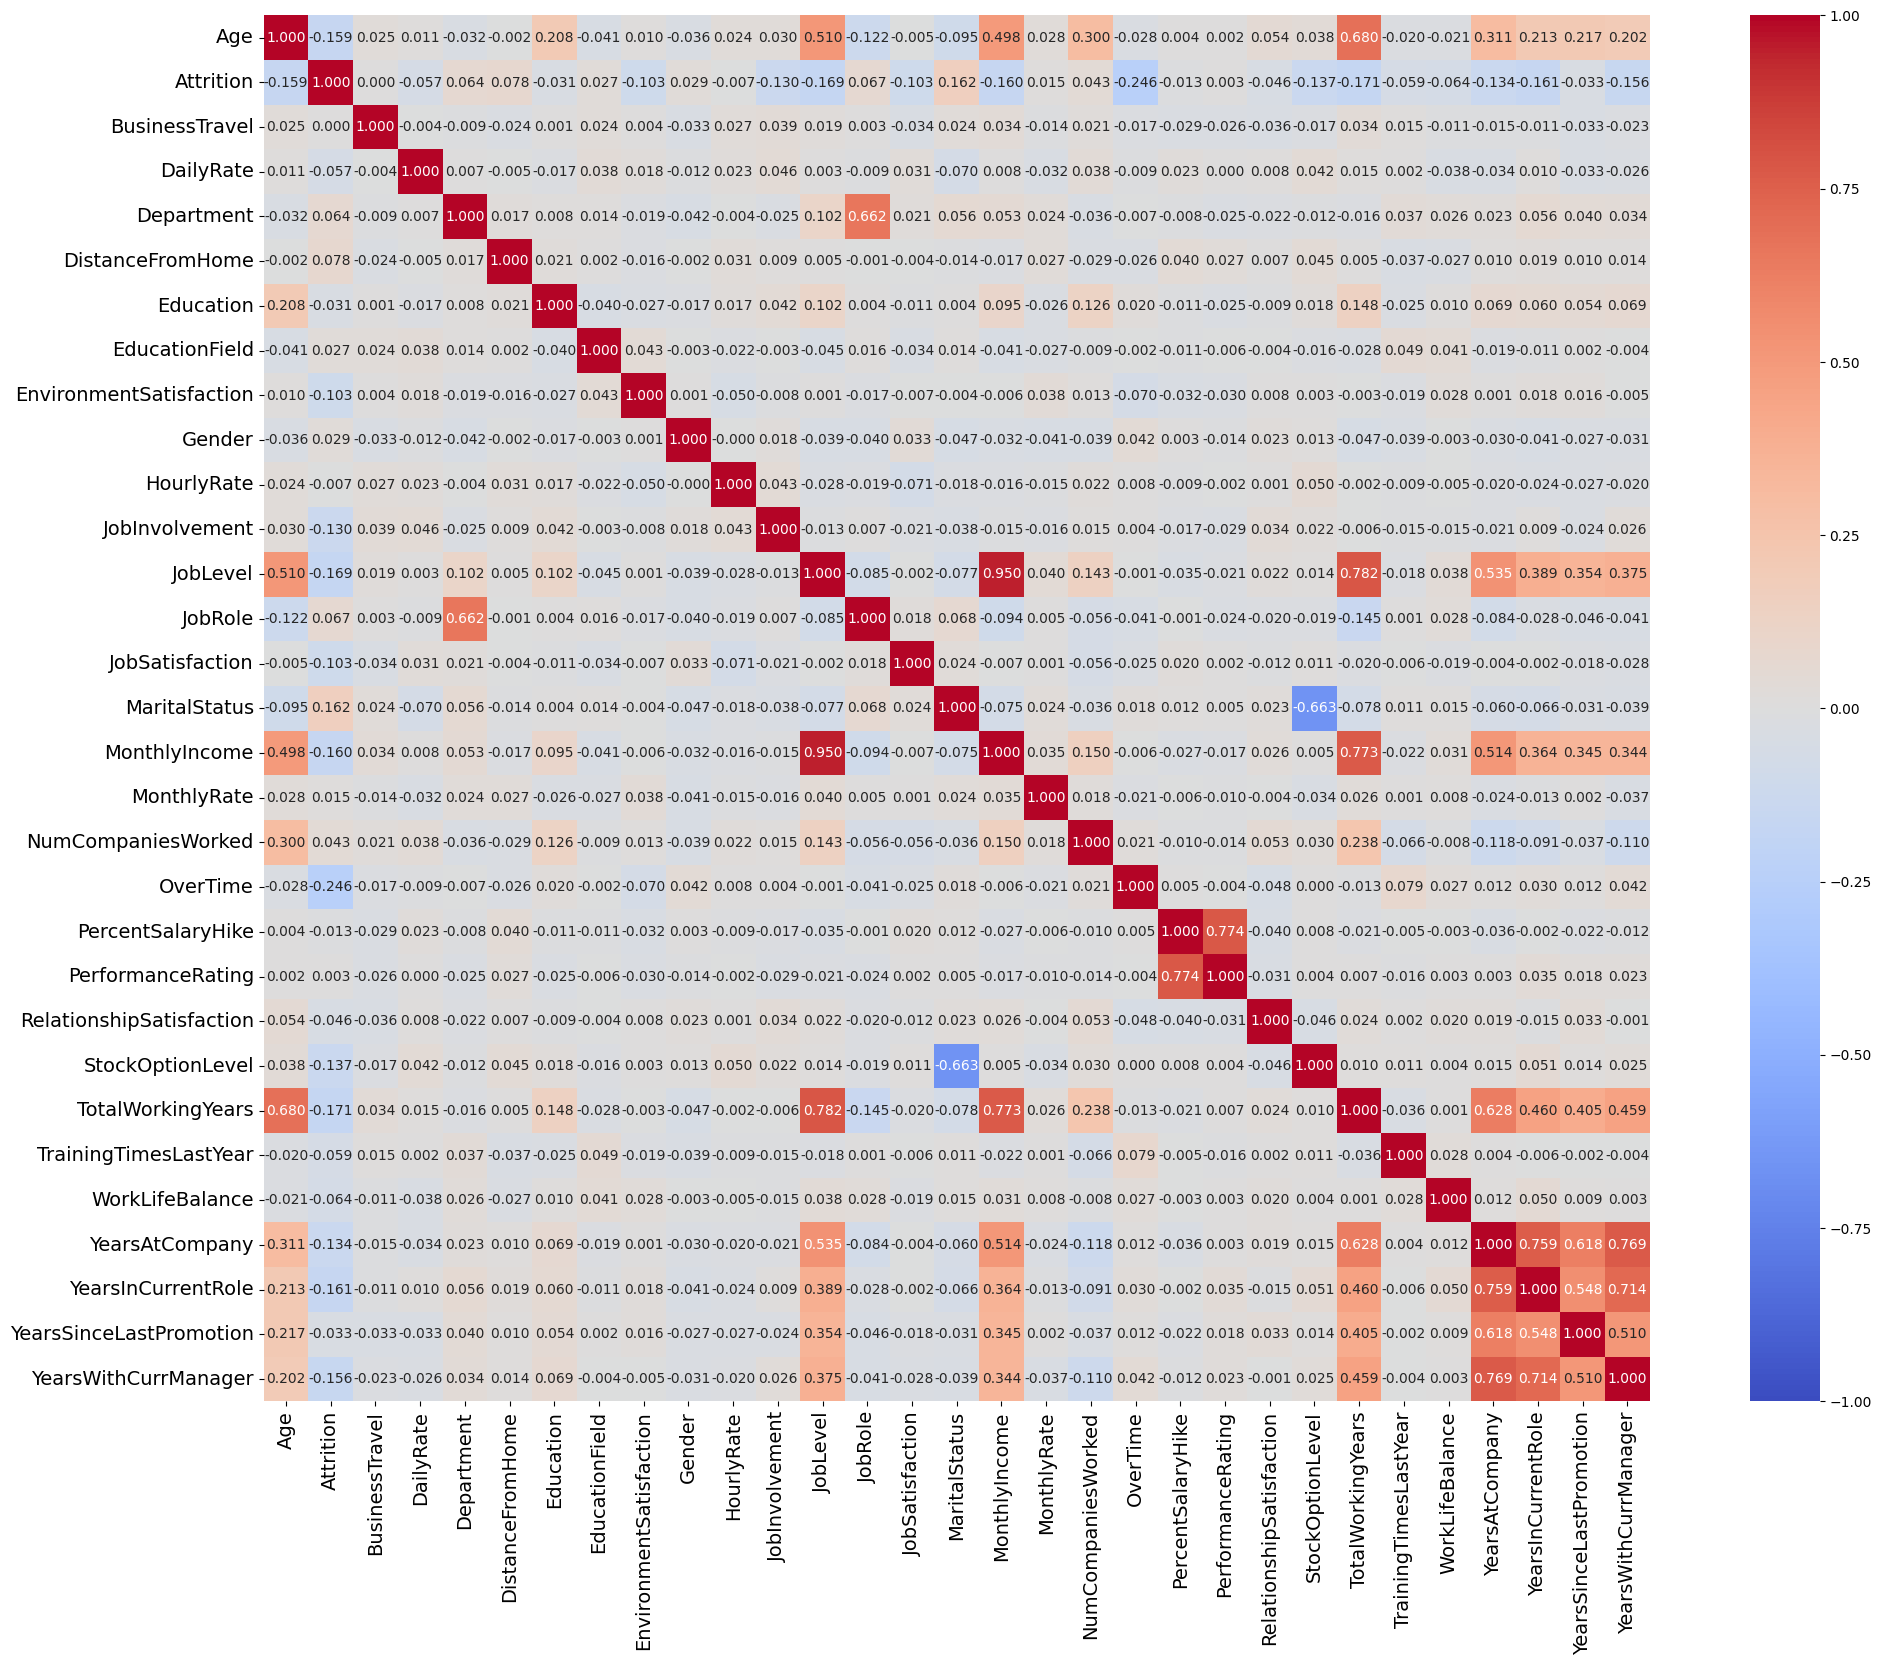

In [63]:
plt.figure(figsize=(26,18))
sns.heatmap(df_HR.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="coolwarm")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

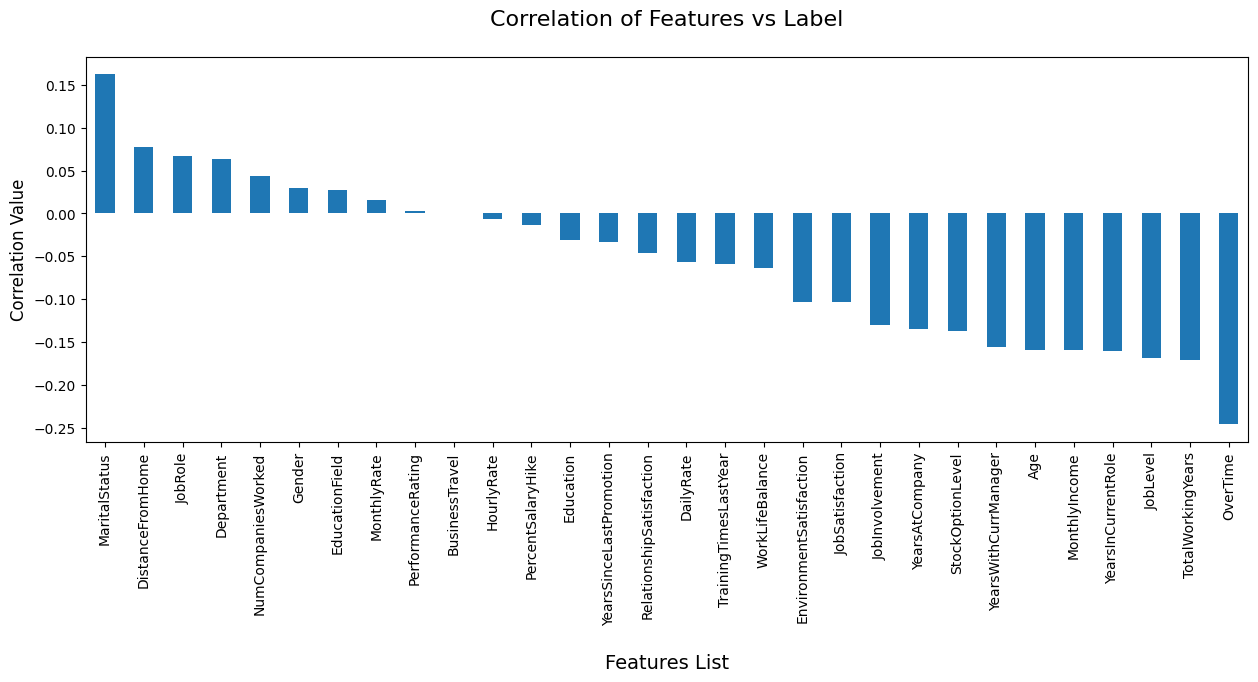

In [64]:
df_HR_corr = df_HR.corr()
plt.figure(figsize=(15,5))
df_HR_corr['Attrition'].sort_values(ascending=False).drop('Attrition').plot.bar()
plt.title("Correlation of Features vs Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

# Using Z Score to remove outliers

In [65]:
z = np.abs(zscore(df_HR))
threshold = 3
df_HR1 = df_HR[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df_HR.shape)
print ("Shape of the dataframe after removing outliers: ", df_HR1.shape)
print ("Percentage of data loss post outlier removal: ", (df_HR.shape[0]-df_HR1.shape[0])/df_HR.shape[0]*100)

df_HR=df_HR1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (1470, 31)
Shape of the dataframe after removing outliers:  (1387, 31)
Percentage of data loss post outlier removal:  5.646258503401361


I have used the Z score method to remove the outliers since the IQR method was making me lose way more than 10 percent of data which I could not have afforded to lose.

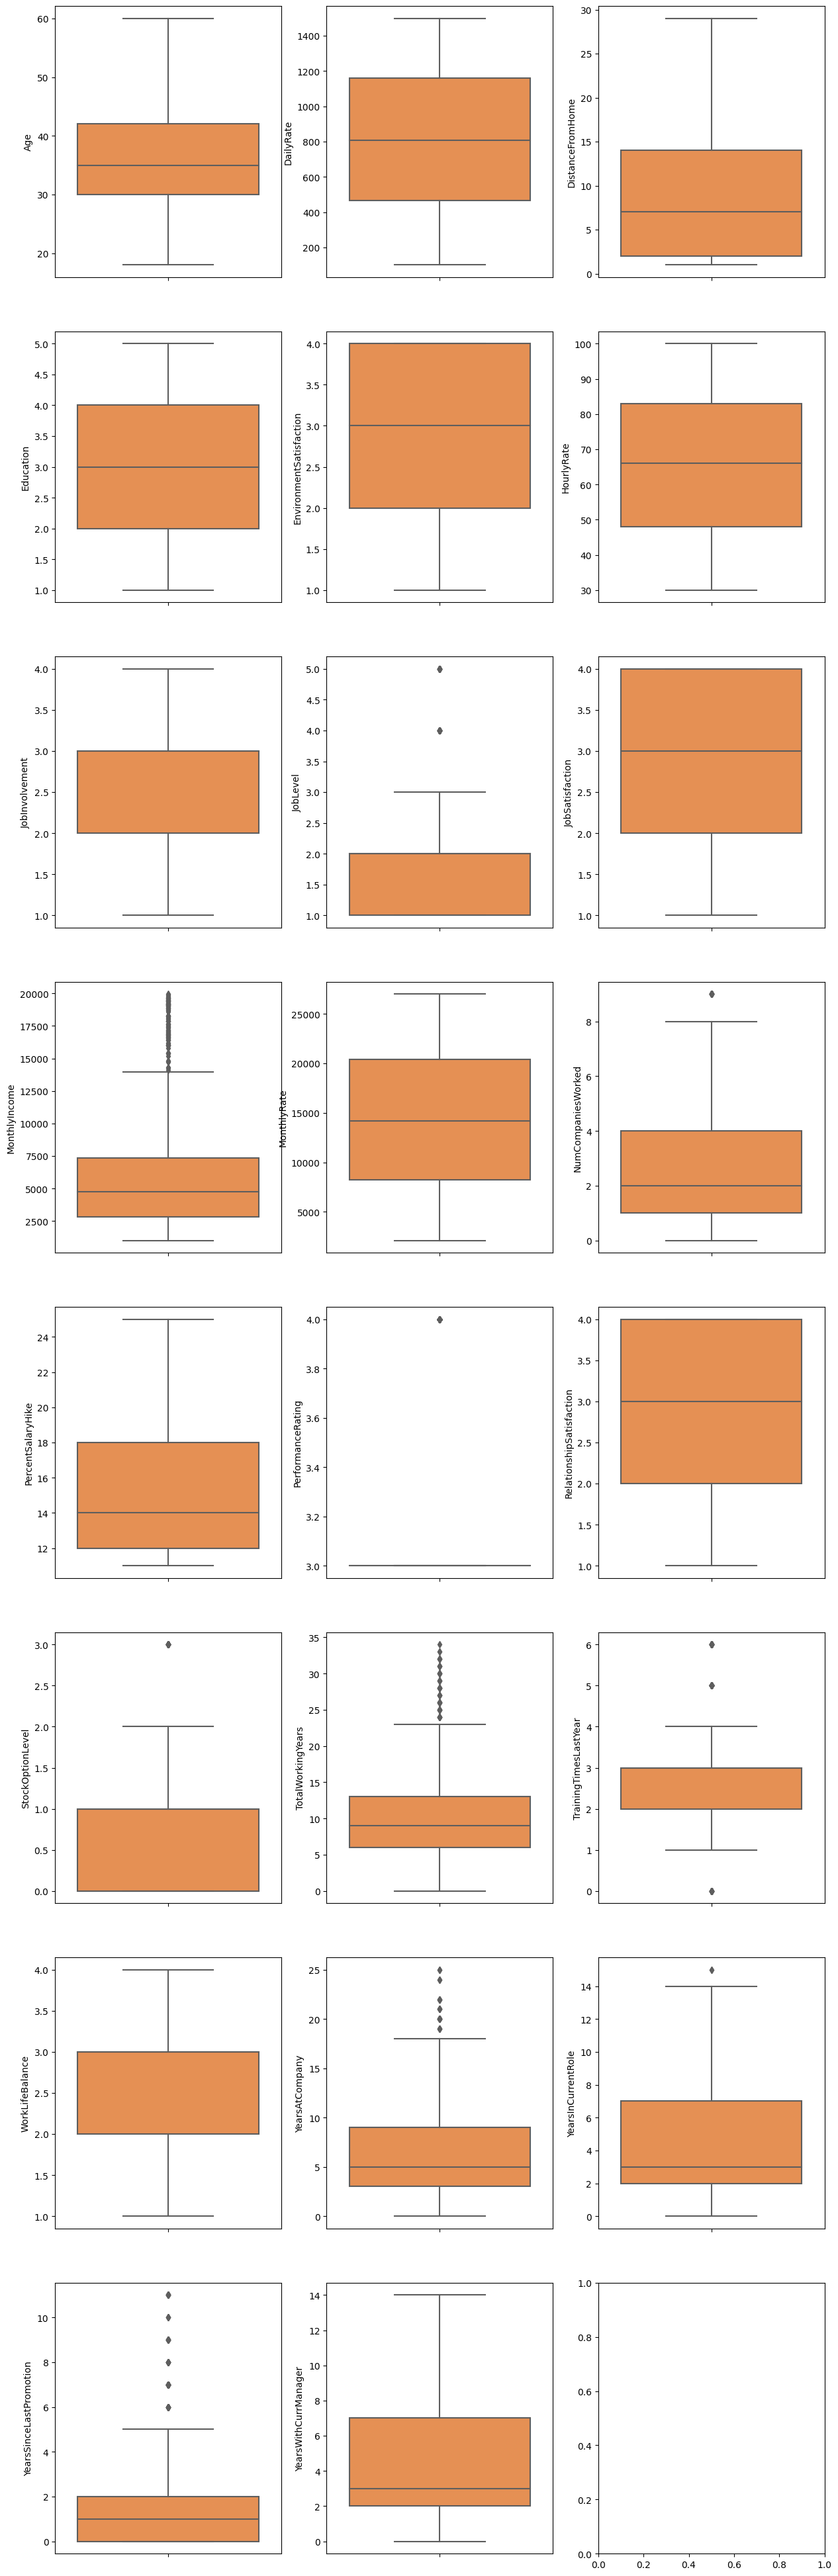

In [67]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df_HR[integer_datatype].items():
    sns.boxplot(y=col, data=df_HR, ax=ax[index], palette="Oranges")
    index += 1
plt.show()

In [68]:
df_HR.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                   -0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

With the skew method we see that there are columns present in our dataset that are above the acceptable range of +/-0.5 value.

# Using Log Transform to fix skewness


In [69]:
for col in integer_datatype:
    if df_HR.skew().loc[col]>0.55:
        df_HR[col]=np.log1p(df_HR[col])

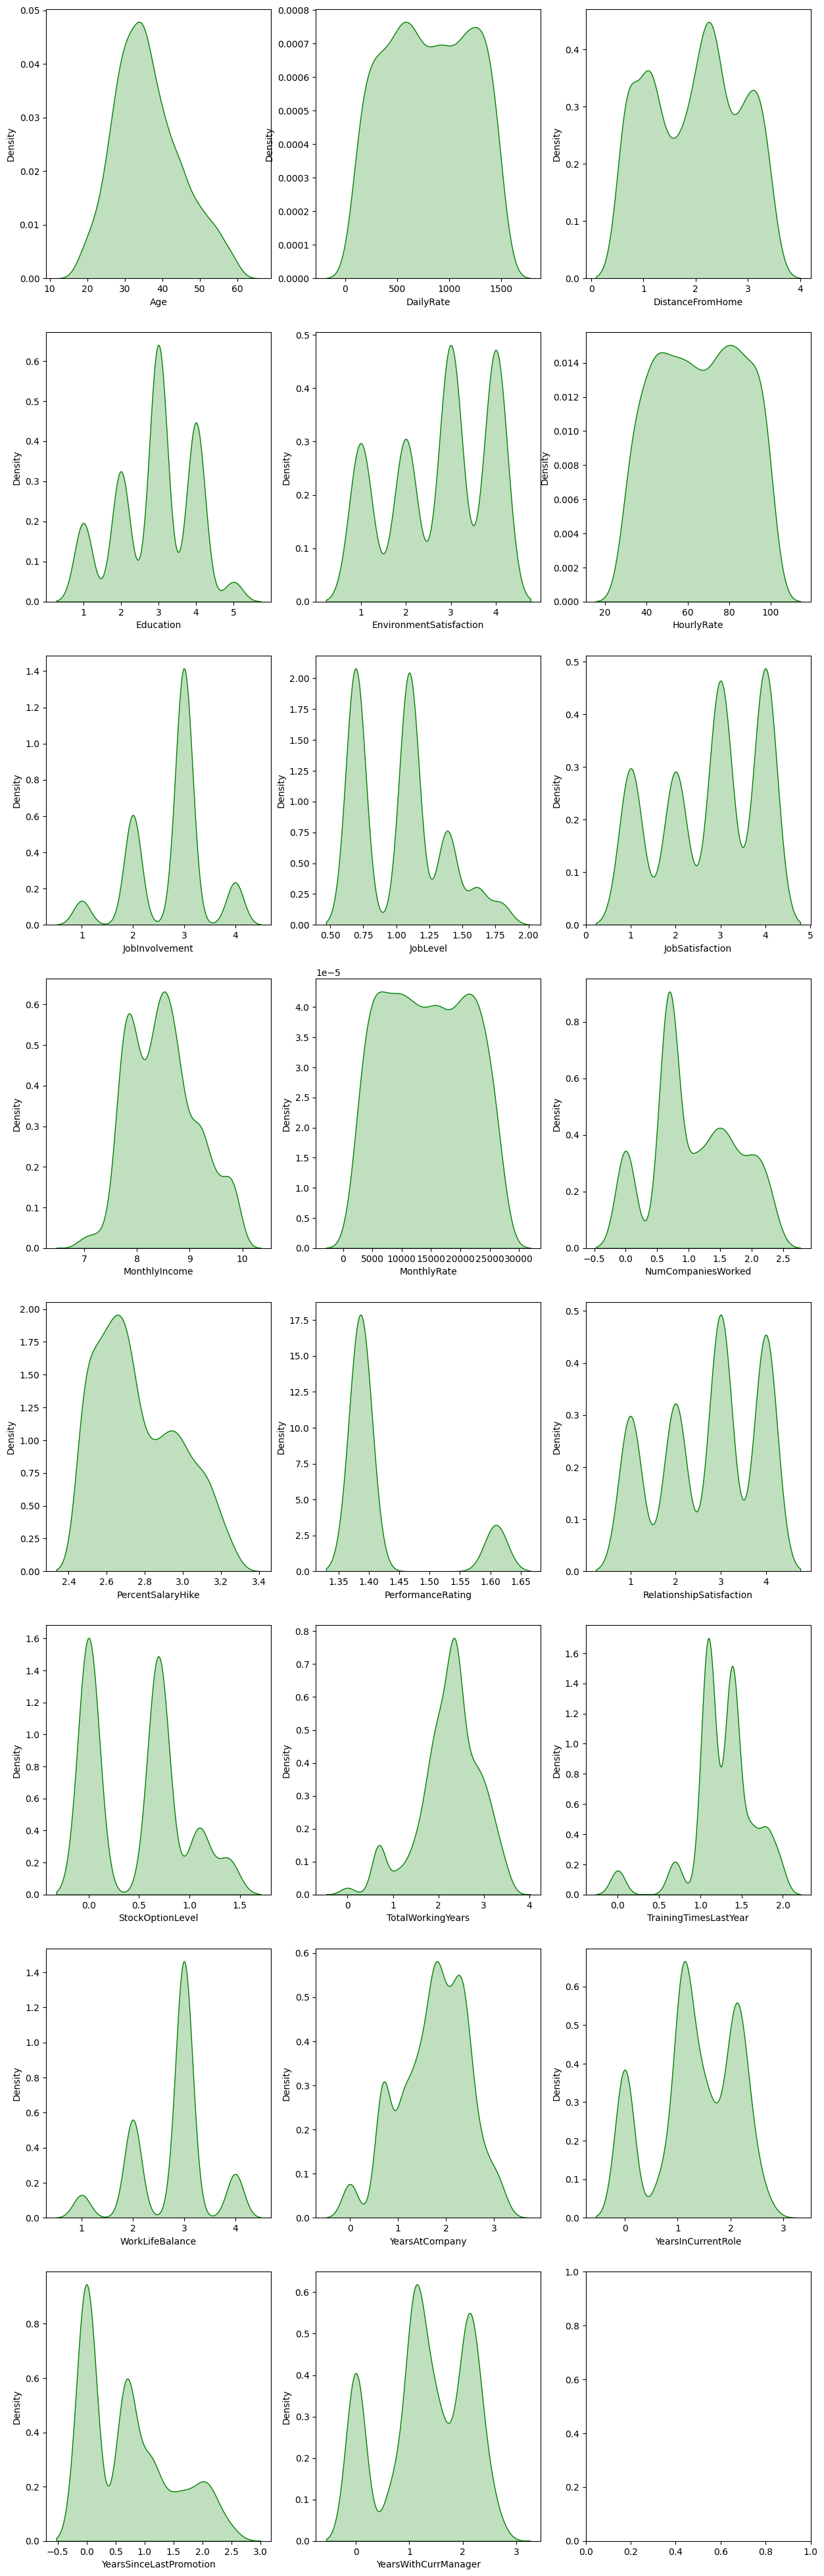

In [70]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df_HR[integer_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.show()

We have managed to reduce the skewness from our numerical columns and that can be seen in the above distribution plot as well.

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [71]:
X = df_HR.drop('Attrition', axis=1)
Y = df_HR['Attrition']

# Resolving the class imbalance issue in label column

In [72]:
Y.value_counts()

Attrition
0    1158
1     229
Name: count, dtype: int64

In [73]:
# adding samples to make all the categorical quality values same

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

SMOTE is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same value.

In [74]:
Y.value_counts()

Attrition
1    1158
0    1158
Name: count, dtype: int64

After applying over sampling we are once again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category.

# Feature Scaling

In [75]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0  0.737881        0.667594   0.804564    1.404095         -1.702523   
1  1.674282       -0.995016  -1.322650   -0.564803          0.182048   
2  0.269680        0.667594   1.505019   -0.564803         -1.194485   
3 -0.198520       -0.995016   1.554129   -0.564803         -0.834027   
4 -0.900821        0.667594  -0.516222   -0.564803         -1.194485   

   Education  EducationField  EnvironmentSatisfaction    Gender  HourlyRate  \
0  -0.745323       -1.002493                -0.405183 -1.352286    1.518508   
1  -1.777720       -1.002493                 0.513020  0.852143   -0.252536   
2  -0.745323        1.356331                 1.431224  0.852143    1.411172   
3   1.319471       -1.002493                 1.431224 -1.352286   -0.520876   
4  -1.777720        0.570056                -1.323386  0.852143   -1.379565   

   JobInvolvement  JobLevel   JobRole  JobSatisfaction  MaritalStatus  \
0        0.654861  0.424063  0.997222         1.396947       1.148419   
1       -0.692082  0.424063  0.575168        -0.471026      -0.299244   
2       -0.692082 -0.960136 -1.113051         0.462960       1.148419   
3        0.654861 -0.960136  0.575168         0.462960      -0.299244   
4        0.654861 -0.960136 -1.113051        -0.471026      -0.299244   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0       0.543810     0.729192            1.761709 -1.336360   
1       0.282673     1.501678           -0.652147  0.874749   
2      -1.225206    -1.701976            1.358380 -1.336360   
3      -0.670017     1.252911           -0.652147 -1.336360   
4      -0.374855     0.324021            1.930799  0.874749   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0          -1.366273          -0.480843                 -1.420619   
1           2.070510           2.452125                  1.415720   
2           0.060121          -0.480843                 -0.475173   
3          -1.366273          -0.480843                  0.470274   
4          -0.969403          -0.480843                  1.415720   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0         -0.951706           0.167515              -3.489911   
1          0.647561           0.460062               0.371324   
2         -0.951706          -0.004195               0.371324   
3         -0.951706           0.167515               0.371324   
4          0.647561          -0.198863               0.371324   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0        -2.178455        0.510985            0.569833   
1         0.539187        1.166089            1.198852   
2         0.539187       -2.309402           -1.584122   
3         0.539187        0.875238            1.198852   
4         0.539187       -0.717082           -0.113819   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                -0.994557              0.843292  
1                 0.003848              1.218783  
2                -0.994557             -1.495361  
3                 1.002253             -1.495361  
4                 0.587877             -0.061422

# Finding best random state for building Regression Models

In [76]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 88.94645941278065 on Random State 895


# Great so with the help of random state selection process we have found our lucky number to be 759 amongst 1-1000

Creating the training and testing data sets

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=759)

I am taking 25 percent of the complete dataset for training purpose and the remaing 75 percent with be used to train the machine learning models using the random state as 759

# Machine Learning Model for Classification with Evaluation Metrics

In [78]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=759)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I have defined a class that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any machine learning model that calls for this function.

In [79]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 87.56476683937824

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.87       291
           1       0.86      0.89      0.88       288

    accuracy                           0.88       579
   macro avg       0.88      0.88      0.88       579
weighted avg       0.88      0.88      0.88       579

Cross Validation Score: 84.50333283682131

Accuracy Score - Cross Validation Score is 3.061434002556922


In [80]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 92.2279792746114

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       291
           1       0.93      0.91      0.92       288

    accuracy                           0.92       579
   macro avg       0.92      0.92      0.92       579
weighted avg       0.92      0.92      0.92       579

Cross Validation Score: 90.8965144857377

Accuracy Score - Cross Validation Score is 1.3314647888737028


In [81]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 85.146804835924

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       291
           1       0.85      0.85      0.85       288

    accuracy                           0.85       579
   macro avg       0.85      0.85      0.85       579
weighted avg       0.85      0.85      0.85       579

Cross Validation Score: 83.85957399270127

Accuracy Score - Cross Validation Score is 1.28723084322273


In [82]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 93.78238341968913

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       291
           1       0.97      0.90      0.94       288

    accuracy                           0.94       579
   macro avg       0.94      0.94      0.94       579
weighted avg       0.94      0.94      0.94       579

Cross Validation Score: 90.59870037983168

Accuracy Score - Cross Validation Score is 3.183683039857442


In [88]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 95.50949913644214

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       291
           1       0.96      0.94      0.95       288

    accuracy                           0.96       579
   macro avg       0.96      0.96      0.96       579
weighted avg       0.96      0.96      0.96       579

Cross Validation Score: 93.61612795114323

Accuracy Score - Cross Validation Score is 1.8933711852989177


In [89]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)

Accuracy Score: 93.78238341968913

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       291
           1       0.97      0.91      0.94       288

    accuracy                           0.94       579
   macro avg       0.94      0.94      0.94       579
weighted avg       0.94      0.94      0.94       579

Cross Validation Score: 88.78844864824607

Accuracy Score - Cross Validation Score is 4.993934771443051


In [90]:
# LGBM Classifier

model=lgb.LGBMClassifier()
classify(model, X, Y)

[LightGBM] [Info] Number of positive: 870, number of negative: 867
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5222
[LightGBM] [Info] Number of data points in the train set: 1737, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500864 -> initscore=0.003454
[LightGBM] [Info] Start training from score 0.003454
Accuracy Score: 93.26424870466322

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       291
           1       0.96      0.90      0.93       288

    accuracy                           0.93       579
   macro avg       0.93      0.93      0.93       579
weighted avg       0.93      0.93      0.93       579

[LightGBM] [Info] Number of positive: 926, number of negative: 926
[LightGBM] [Info] Auto-choosing col-wise multi-threading, th

# Hyper parameter tuning on the best Classification ML Model

In [91]:
# Choosing Decision Tree Classifier

fmod_param = {'criterion' : ["gini", "entropy"],
              'splitter' : ["best", "random"],
              'min_samples_split' : [2, 3, 4],
              'max_depth' : [4, 6, 8],
              'random_state' : [42, 111, 759]
             }

After comparing all the regression models I have selected Decision Tree Classifier as my best model and have listed down it's parameters above referring the sklearn webpage

In [92]:
GSCV = GridSearchCV(DecisionTreeClassifier(), fmod_param, cv=5)

I am using the Grid Search CV method for hyper parameter tuning my best model.

In [93]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8], 'min_samples_split': [2, 3, 4],
                         'random_state': [42, 111, 759],
                         'splitter': ['best', 'random']})

In [94]:
GSCV.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_split': 2,
 'random_state': 42,
 'splitter': 'best'}

In [95]:
GSCV.best_score_

0.8549322600947364

In [96]:
Test_Model = DecisionTreeClassifier(criterion="entropy", max_depth=8, min_samples_split=4, 
                                     random_state=42, splitter="best")
Classifier = Test_Model.fit(X_train, Y_train)
fmod_pred = Test_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 89.11917098445595


# AUC ROC Curve

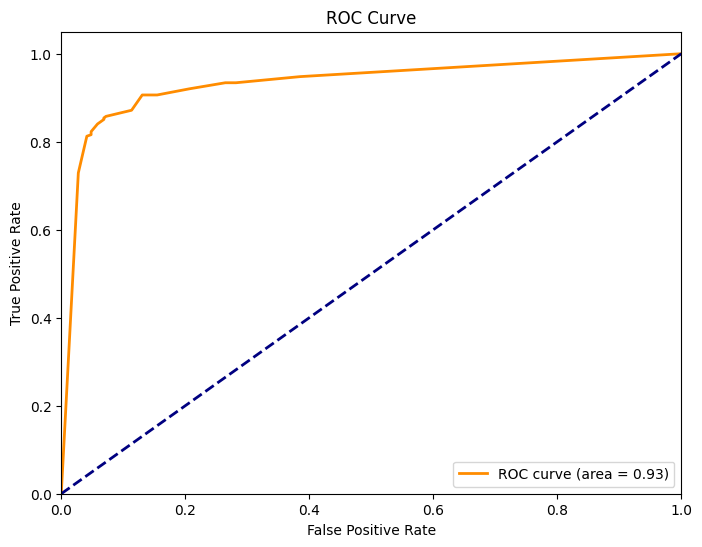

In [99]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming Test_Model is your trained model and X_test is your test data
probas_ = Test_Model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


Saving the model

In [105]:
filename = "Final_HR_Analytics.pkl"
pickle.dump(Test_Model, open(filename,'wb'))